#QR Codes for Used Cars

![alt text](https://s3-prod.crainscleveland.com/s3fs-public/SUB1_301259983_AR_-1_AZFYBPRCYOMP.jpg)

# Car Max: QR Code **Generator**

To solve the issue of inaccurate "Sold" staying on used cars, we decided to implement a QR Code system for each car in the lot. Each QR code links to our website, www.com, which contains information on each car. 

To complete this, first we wrote a QR Code generator function using PyQRCode.

In [0]:
!pip install pyqrcode
!pip install pypng

Below is our function and an example output using CarMax's sport utilities page.

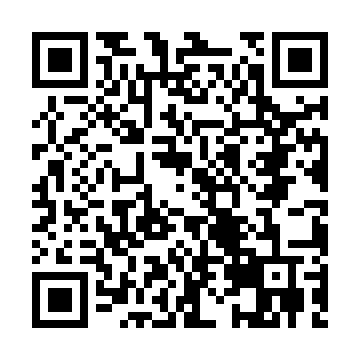

In [0]:
import pyqrcode
import png
from IPython.display import Image


def qrGen(website, file_name, format="PNG"):
    url = pyqrcode.create(website)
    if format == "PNG":
        url.png(file_name, scale=8)
    elif format == "SVG":
        url.svg(file_name, scale=8)
    return file_name

website = "https://www.carmax.com/cars/sport-utilities"

Image(qrGen(website))

# Creating QR codes from SQL entries

In this section, we will import our mySQL database which we stored in Google Cloud. To do this in Colab required several steps, which we go through below.

In [0]:
!pip install pymysql

In [0]:
!gcloud auth login
!gcloud config set project carhacks
!gcloud sql instances describe carhacks

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?code_challenge=wEfvC7lup54J5mDn69T8vvmgctGyo_Unds_uK2rVpcU&prompt=select_account&code_challenge_method=S256&access_type=offline&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth


Enter verification code: 4/rgHX_Di61boXSeHJAJR8u9vLvSokAwagWaw1y1lpCAOMEqfpd6RtErs
If you need to use ADC, see:
  gcloud auth application-default --help

You are now logged in as [nef7xb@virginia.edu].
Your current project is [carhacks].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID
Updated property [core/project].
backendType: SECOND_GEN
c

In [0]:
# download and initialize the psql proxy
!wget https://dl.google.com/cloudsql/cloud_sql_proxy.linux.amd64 -O cloud_sql_proxy
!chmod +x cloud_sql_proxy
# "connectionName" is from the previous block
!nohup ./cloud_sql_proxy -instances="carhacks:us-east1:carhacks"=tcp:3306 &
!sleep 30s
!pip install psycopg2-binary
!curl ipecho.net/plain

cloud_sql_proxy: Text file busy
nohup: appending output to 'nohup.out'
35.196.93.81

In [0]:
import pymysql
# https://github.com/PyMySQL/PyMySQL


conn = pymysql.connect(
    host='35.196.77.133', db='car_real_info',
    user='yager', password='yageryager')
    
print(conn)

try:

  with conn.cursor() as cursor:
        # Read a single record

        sql = "SELECT EntryID FROM entries2"
        cursor.execute(sql)
        car_ids = cursor.fetchall()
        conn.commit()
        print(car_ids)
except:
  print("Failed")

conn.close()


this far
((1,), (2,), (3,), (4,), (5,), (6,), (7,))


Now that the EntryIDs are stored in a list, we can iterate through to create QR codes for each individual entry in the database. These entries each provide general information about each car, including its current status.

In [0]:
base_url = "/car.php?id="

for car in car_ids:
  current_url = base_url + str(car[0])
  name = "qr_code_" + str(car[0])
  file_name = qrGen(current_url, name)
  Image(file_name)

After this, all QR codes are made and stored in the directory. Each code is distinguished by the Entry ID of the car they correspond to in our SQL database.

This eliminates the need for sold signs in the used car lots, because the QR codes will always provide up-to-date information on each car directly from the database. In the case that a sold vehicle is scanned by a customer, a list of similar available vehicles will be recommended using a Python script embedded in our web app.